In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target

In [11]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal width')

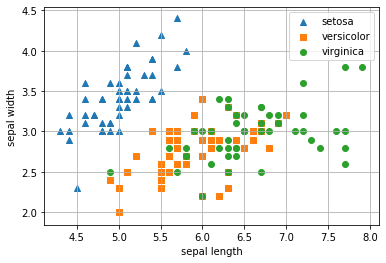

In [14]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.grid()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

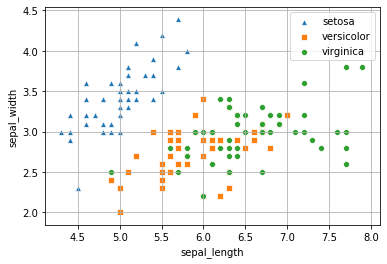

In [15]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    sns.scatterplot(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.grid()

차원 축소하기전에 꼭 표준화를 해줘야한다. 각각의 피쳐들은 제각각의 숫자로 되어 있다. 이걸 서로서로 비교할 수 있게 맞춰줘야 각 피쳐들의 영향력을 제대로 반영하여 차원을 축소할 수 있기 때문이다.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
iris_scaled = StandardScaler().fit_transform(iris_df)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [23]:
pca_columns=['pca_component_1', 'pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target

In [24]:
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


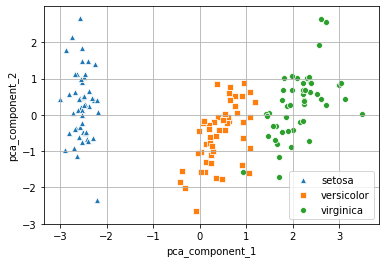

In [31]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_2']
    sns.scatterplot(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.grid()

In [29]:
x_axis_data.head()

100    2.217161
101    1.618667
102    2.519157
103    1.859145
104    2.232384
Name: pca_component_1, dtype: float64

In [32]:
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

In [35]:
scores

array([0.98, 0.94, 0.96])

In [38]:
X_pca = iris_df_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, X_pca, iris.target, scoring='accuracy', cv=3)

In [39]:
scores_pca

array([0.98, 0.98, 1.  ])